<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/week_8/dstep23_geospatial_intro_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DSTEP23 // Introduction to Geospatial Data: Part 1**

*October 17, 2023*

This notebook will introduce tools for working with geospatial data in python using Zipcodes and MapPLUTO in New York City.

---

#### **Loading geospatial data with python**

The core package for working with geospatial data in python is `geopandas`:

In [6]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [10]:
# -- and now let's access the *shapes* of those zipcodes
zname = "/content/drive/Shareddrives/dstep23/data/geos/nyc/zipcode_shapes/ZIP_CODE_040114.shp"
zshps = gp.read_file(zname)

In [13]:
# -- display the type of this new object
type(zshps)

geopandas.geodataframe.GeoDataFrame

In [14]:
# -- display the GeoDataFrame
zshps

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


In [15]:
zshps.dtypes

ZIPCODE         object
BLDGZIP         object
PO_NAME         object
POPULATION     float64
AREA           float64
STATE           object
COUNTY          object
ST_FIPS         object
CTY_FIPS        object
URL             object
SHAPE_AREA     float64
SHAPE_LEN      float64
geometry      geometry
dtype: object

In [16]:
# -- note the coordinates
zshps.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### **Plotting GeoDataFrames**

Much like DataFrames, GeoDataFrames have plotting methods that are wrappers around, and tightly integrated with, `matplotlib`,

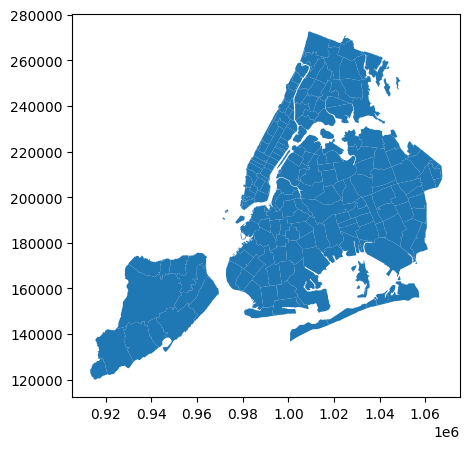

In [17]:
# -- a simple plot
fig, ax = plt.subplots(figsize=(5,5))
zshps.plot(ax=ax)

fig.show()

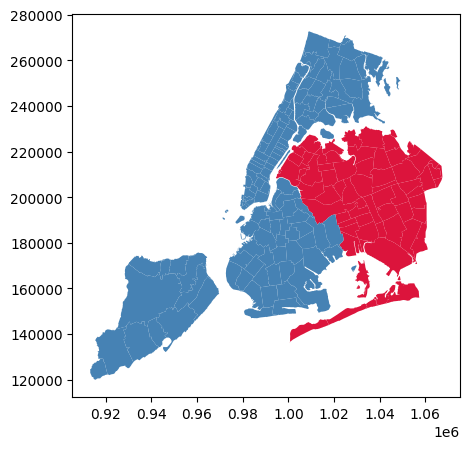

In [19]:
# -- highlight zipcodes in Queens
queens = zshps[zshps["COUNTY"] == "Queens"]
others = zshps[zshps["COUNTY"] != "Queens"]

fig, ax = plt.subplots(figsize=(5,5))
queens.plot(facecolor="crimson", ax=ax)
others.plot(facecolor="steelblue", ax=ax)
fig.show()

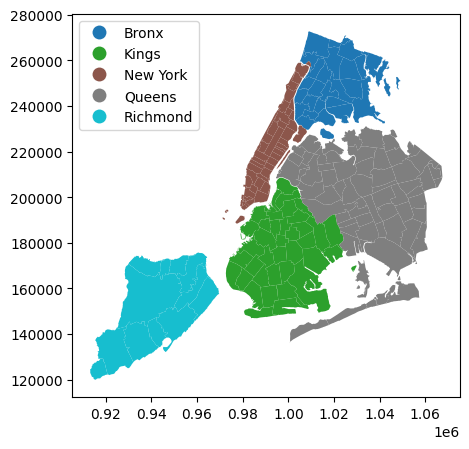

In [23]:
# -- plot categorical variables
fig, ax = plt.subplots(figsize=(5,5))
zshps.plot("COUNTY", legend=True, legend_kwds={"loc": "upper left"},ax=ax)
fig.show()

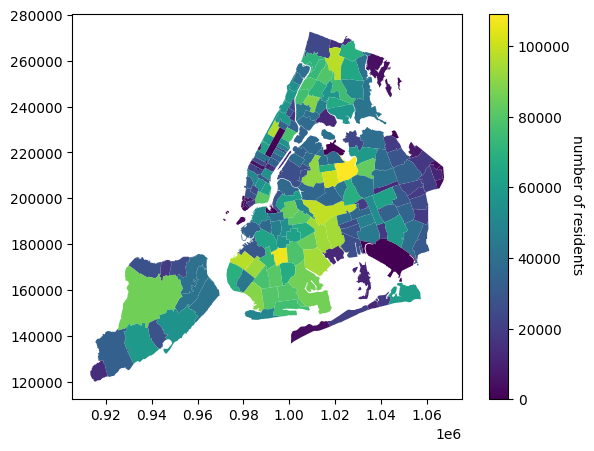

In [28]:
# -- make a color-coded "map" of numerical variables
fig, ax = plt.subplots(figsize=(7,5))

zshps.plot("POPULATION", legend=True, ax=ax)
fig.text(0.9,0.5,"number of residents", rotation=-90, va="center")

fig.show()

The usual non-spatial plotting routines are available as well,

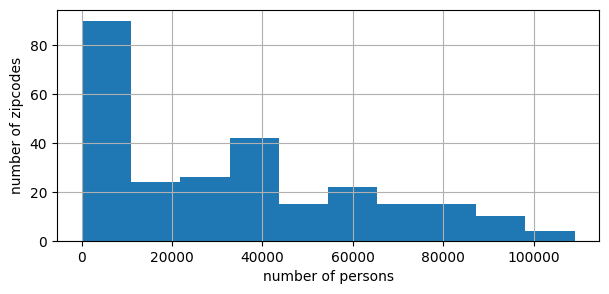

In [31]:
# -- make a histogram of the population values
fig, ax = plt.subplots(figsize = (7,3))
zshps.hist("POPULATION", ax=ax)
ax.set_xlabel("number of persons")
ax.set_ylabel("number of zipcodes")
ax.set_title("")
fig.show()

#### **Accessing and working with values, attributes, and methods in GeoDataFrames**

The values in GeoDataFrames can be accessed and used identically to DataFrames,

In [ ]:
# -- display the "POPULATION" column


In [ ]:
# -- calculate summary statistics of the various numerical columns


Many of the attributes and methods of GeoDataFrames are the same as DataFrames,

In [ ]:
# -- print the columns attribute


In [ ]:
# -- access the 5th row


In [ ]:
# -- print the unique values of categorical variables


but some are **unique** to GeoDataFrames,

In [ ]:
# -- print the centroid attribute of the GeoDataFrame


In [ ]:
# -- print the area attribute (but note this data set contains the same info in a column)


In [ ]:
# -- display just the geometry of a single row
geo5 =

geo5

In [ ]:
# -- for each zipcode, find the distance to the 5th zipcode using the distance method


Let's demonstrate this last one with a plot,

In [ ]:
# -- make a color-coded "map" of that distance
fig, ax = plt.subplots(figsize=(9, 7))


# -- label the colorbar


# -- add an X where the 5th zipcode is
geo5x =
geo5y =
ax.scatter([geo5x], [geo5y], marker="*", s=200, color="r")

fig.show()